In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-59.56146393188797 96.43801871977632
-73.04900631505514 -149.7129553096656
-45.479954505325956 -175.74118895568068
-74.41862725496682 176.58921053663818
32.38659701952521 4.961232058017487
9.929811883159104 63.829115474038076
2.398357570662256 106.45910054939253
-1.270856302040329 -169.70754323765914
15.443957286823007 32.80684099441035
49.907805458670424 91.05445084696146
2.5194446426522745 145.18648007437713
1.984380718813938 -171.19889324293055
65.32062579938105 -100.58111553842792
3.2627547097429925 -137.1109949970001
87.33960431932906 -145.66625490333652
65.88796371735532 -48.43961627481514
5.174424592683977 88.04039307197763
85.90003035822951 15.181683150421208
-8.007341847402841 -62.30080691371687
-41.08297380838332 129.14857706646575
50.03345130938749 99.55720323315654
-73.02887965021037 -179.47173480610857
-74.95933848642274 154.65905516347146
14.353690292358124 -64.50468766982549
75.07526906047624 -8.021125185956265
-72.89429044907014 153.0623104985225
39.787075388514836 176.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
import requests

#import the api key

from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=554f8c68291004f62843b829cade0452


In [9]:
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Salt+Lake+City"
#print(city_url)

In [10]:
#import time library & date/time module from the datetime library
import time
from datetime import datetime

In [20]:
#Create empty list
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval          ")
print("----------------------------------")


#Create counters
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



        
        

Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | warqla
City not found. Skipping...
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | kijang
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | khartoum
Processing Record 10 of Set 1 | mugur-aksy
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | kalmunai
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | humaita
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | moron
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 4 | almaznyy
Processing Record 39 of Set 4 | galesong
Processing Record 40 of Set 4 | nyurba
Processing Record 41 of Set 4 | quelimane
Processing Record 42 of Set 4 | saint-georges
Processing Record 43 of Set 4 | abohar
Processing Record 44 of Set 4 | moranbah
Processing Record 45 of Set 4 | goderich
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | lolua
City not found. Skipping...
Processing Record 48 of Set 4 | faanui
Processing Record 49 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 50 of Set 4 | kurmanayevka
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | forecariah
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | kortkeros
Processing Record 5 of Set 5 | talas
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 | pevek
Process

Processing Record 26 of Set 8 | southbridge
Processing Record 27 of Set 8 | mamlyutka
Processing Record 28 of Set 8 | bacolod
Processing Record 29 of Set 8 | rio gallegos
Processing Record 30 of Set 8 | kieta
Processing Record 31 of Set 8 | villazon
Processing Record 32 of Set 8 | biak
Processing Record 33 of Set 8 | dashitou
Processing Record 34 of Set 8 | manggar
Processing Record 35 of Set 8 | ixtapa
Processing Record 36 of Set 8 | batagay
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | krasnaya gora
Processing Record 39 of Set 8 | monrovia
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | kisangani
Processing Record 42 of Set 8 | masindi
Processing Record 43 of Set 8 | erice
Processing Record 44 of Set 8 | marsh harbour
Processing Record 45 of Set 8 | leonidovo
Processing Record 46 of Set 8 | cockburn town
Processing Record 47 of Set 8 | umtata
Processing Record 48 of Set 8 | ravar
Processing Record 49 of Set 8 | chaa-khol
City not fo

Processing Record 15 of Set 12 | hun
Processing Record 16 of Set 12 | alyangula
Processing Record 17 of Set 12 | newport
Processing Record 18 of Set 12 | campoverde
Processing Record 19 of Set 12 | birin
Processing Record 20 of Set 12 | ahipara
Processing Record 21 of Set 12 | sanmenxia
Processing Record 22 of Set 12 | aksu
Processing Record 23 of Set 12 | boa vista
Processing Record 24 of Set 12 | bonavista
Processing Record 25 of Set 12 | ipixuna
Processing Record 26 of Set 12 | palmas bellas
Processing Record 27 of Set 12 | haibowan
City not found. Skipping...
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | cap-aux-meules
Processing Record 30 of Set 12 | yalutorovsk
Processing Record 31 of Set 12 | matagami
Processing Record 32 of Set 12 | warangal
Processing Record 33 of Set 12 | luganville
Processing Record 34 of Set 12 | villa maria
Processing Record 35 of Set 12 | linjiang
Processing Record 36 of Set 12 | vila velha
Processing Record 37 of Set 12 |

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.16,87,12,10.09,AU,2022-06-11 18:19:52
1,Mataura,-46.1927,168.8643,37.47,89,77,6.13,NZ,2022-06-11 18:19:53
2,Vaini,-21.2000,-175.2000,73.56,100,40,4.61,TO,2022-06-11 18:19:53
3,Kaitangata,-46.2817,169.8464,36.39,78,71,8.77,NZ,2022-06-11 18:19:54
4,Kavaratti,10.5669,72.6420,83.41,78,65,16.58,IN,2022-06-11 18:19:54
5,Kijang,35.2442,129.2139,65.93,88,1,9.40,KR,2022-06-11 18:19:54
6,Khartoum,15.5518,32.5324,95.02,33,46,6.04,SD,2022-06-11 18:16:17
7,Mugur-Aksy,50.3500,90.5000,58.82,43,65,4.14,RU,2022-06-11 18:19:55
8,Lorengau,-2.0226,147.2712,80.56,76,43,5.44,PG,2022-06-11 18:19:55
9,Thompson,55.7435,-97.8558,66.36,42,40,6.91,CA,2022-06-11 18:19:56


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-06-11 18:19:52,-33.6500,115.3333,61.16,87,12,10.09
1,Mataura,NZ,2022-06-11 18:19:53,-46.1927,168.8643,37.47,89,77,6.13
2,Vaini,TO,2022-06-11 18:19:53,-21.2000,-175.2000,73.56,100,40,4.61
3,Kaitangata,NZ,2022-06-11 18:19:54,-46.2817,169.8464,36.39,78,71,8.77
4,Kavaratti,IN,2022-06-11 18:19:54,10.5669,72.6420,83.41,78,65,16.58
...,...,...,...,...,...,...,...,...,...
532,Villa Maria,AR,2022-06-11 18:33:55,-32.4075,-63.2402,66.81,34,0,8.86
533,Linjiang,CN,2022-06-11 18:33:56,41.8069,126.9078,52.79,98,29,2.17
534,Vila Velha,BR,2022-06-11 18:30:51,-20.3297,-40.2925,76.95,77,100,14.00
535,Chegdomyn,RU,2022-06-11 18:33:56,51.1167,133.0167,53.33,86,14,2.59


In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.16,87,12,10.09,AU,2022-06-11 18:19:52
1,Mataura,-46.1927,168.8643,37.47,89,77,6.13,NZ,2022-06-11 18:19:53
2,Vaini,-21.2000,-175.2000,73.56,100,40,4.61,TO,2022-06-11 18:19:53
3,Kaitangata,-46.2817,169.8464,36.39,78,71,8.77,NZ,2022-06-11 18:19:54
4,Kavaratti,10.5669,72.6420,83.41,78,65,16.58,IN,2022-06-11 18:19:54
5,Kijang,35.2442,129.2139,65.93,88,1,9.40,KR,2022-06-11 18:19:54
6,Khartoum,15.5518,32.5324,95.02,33,46,6.04,SD,2022-06-11 18:16:17
7,Mugur-Aksy,50.3500,90.5000,58.82,43,65,4.14,RU,2022-06-11 18:19:55
8,Lorengau,-2.0226,147.2712,80.56,76,43,5.44,PG,2022-06-11 18:19:55
9,Thompson,55.7435,-97.8558,66.36,42,40,6.91,CA,2022-06-11 18:19:56


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

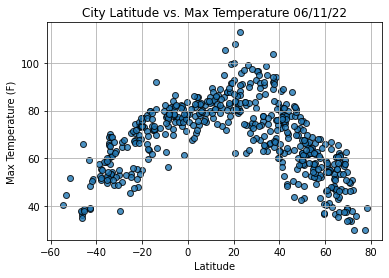

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

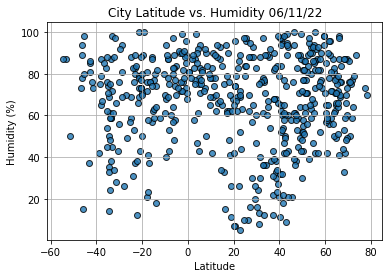

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

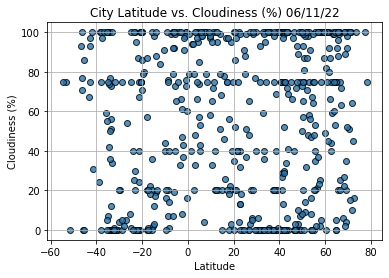

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

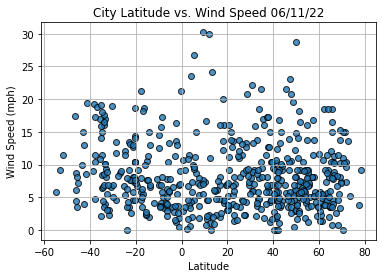

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()